# Lab 3: Hands on

We will look at

1. Univariate Gaussian Distributions
2. Multivariate Gaussian Distributions
3. sampling from them on our own and using the libraries
4.

In [3]:
import numpy as np
import  matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal, norm
from scipy.stats import norm
import scipy
from sklearn.gaussian_process.kernels import RBF

rng = np.random.default_rng(12345)

### Univariate Normal Distribution

*   A random variable X is normally distributed with mean $\mu$ and variance $\sigma^2$ if it has the probability density function of X as:
$$ f(x) = \frac{1}{\sqrt{2 \pi} \sigma} exp{\left(-\frac{{\left(x - \mu \right)}^{2}}{2 \sigma^{2}}\right)}$$

*   In this expression, you see the squared difference between the variable $x$ and its mean, $\mu$.
*   This value will be minimized when $x$ is equal to $\mu$.
*   The quantity $-\frac{{x-\mu}^2}{\sigma^2}$ will take its largest value when $x$ is equal to $\mu$ or likewise since the exponential function is a monotone function, the normal density takes a maximum value when $x$ is equal to $\mu$.
*   The variance $\sigma^2$ defines the spread of the distribution about that maximum. If it is large, then the spread is going to be large, otherwise, if the value is small, then the spread will be small.




If $X$ is random variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$, then we will denote it as $X \sim \mathcal{N}(\mu, \sigma^2)$.    

    
If you are not familiar, play around with this link: https://demonstrations.wolfram.com/TheNormalDistribution/


**Task 1**: Write a Python function that computes the probability density function (PDF) of the normal distribution for scalar or array inputs.

In [7]:
def normal_pdf(x, mean, std_dev):
    """
    Compute the PDF of the normal distribution at input(s) x.

    Parameters:
        x (np.ndarray): Input value(s) is a numpy array of shape (n,).
                        n is the number of samples
        mean (float): Mean (μ) of the distribution.
        std_dev (float): Standard deviation (σ > 0) of the distribution.

    Returns:
        np.ndarray: PDF value(s) at x, same shape as input x.
    """
    # Your code here
    

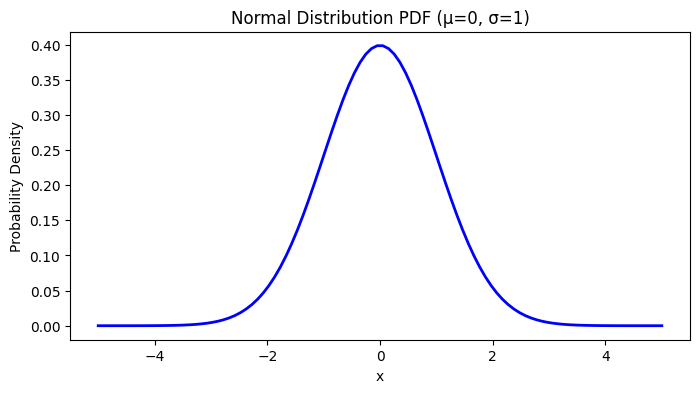

In [6]:
x = np.linspace(-5, 5, 100)
pdf_values = normal_pdf(x, mean=0, std_dev=1)

plt.figure(figsize=(8, 4))
plt.plot(x, pdf_values, 'b-', linewidth=2)
plt.title('Normal Distribution PDF (μ=0, σ=1)')
plt.xlabel('x')
plt.ylabel('Probability Density')
# plt.grid(True)
plt.show()

### The Multivariate Case


The multivariate normal distribution of a k-dimensional random vector  $\mathbf{X} = (X_1, X_2, ..., X_k)^{T}$ is written as $\mathbf{X} \sim \mathcal{N}(\mathbf{\mu}, \Sigma)$.
The probability density function is given as follows:
  $$f(\mathbf{x}) = \frac{1}{{(2\pi)^{k/2}|\Sigma|^{1/2}}}\exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\right)$$
  
where, $\mathbf{\mu} = E[\mathbf{X}] = (E[X_1], E[X_2], ..., E[X_k])^{T}$ and $\Sigma_{i,j} = E[(X_i-\mu_i)(X_j-\mu_j)] = Cov[X_i, X_j]$
    

  
*Fun fact: correctly constructed covariance matrices are always symmetric and positive semi-definite. And thus invertible.*

Let us look at the covariance matrix in detail:
$\Sigma_{i,j} = E[(X_i-\mu_i)(X_j-\mu_j)] = Cov[X_i, X_j]$


$$
    \Sigma_{k\times k} = \begin{bmatrix}
        \sigma_1^2          & cov(x_1, x_2)^2       & \ldots    & cov(x_1, x_{k-1})    & cov(x_1, x_k) \\
        cov(x_2, x_1)^2     & \sigma_2^2            & \ldots    & cov(x_2, x_{k-1})    & cov(x_2, x_k) \\
        \vdots              & \vdots                & \ddots    & \vdots                & \vdots \\
        cov(x_{k-1}, x_1)^2 & cov(x_{k-1}, x_2)^2   & \ldots    & \sigma_{k-1}^2        & cov(x_{k-1}, x_k)^2\\
        cov(x_k, x_1)^2     & cov(x_k, x_2)^2       & \ldots    & cov(x_k, x_{k-1})^2   & \sigma_k^2\\
    \end{bmatrix}
$$

The diagonal elements of the matrix contain the variances of the variables.

The off-diagonal elements contain the covariance between all possible pairs of variables.

    
Let us look at a bivariate Gaussian Distribution for different values of the covariance matrix.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal  # For validation

def self_mvn_pdf(x, mean, cov):
    """
    Compute the PDF of the multivariate normal distribution at input(s) x.

    Parameters:
        x (np.ndarray): Input value(s) as a 2D array of shape (n_samples, n_dims).
        mean (np.ndarray): Mean vector (μ) of shape (n_dims,).
        cov (np.ndarray): Covariance matrix (Σ) of shape (n_dims, n_dims).

    Returns:
        np.ndarray: PDF value(s) at x, shape (n_samples,).
    """
    n_dims = len(mean)

    mean = mean.reshape(-1,1)

    # Input validation
    if cov.shape != (n_dims, n_dims):
        raise ValueError("Covariance matrix must be square and match mean dimensions.")
    if x.shape[1] != n_dims:
        raise ValueError("Input x dimensions must match mean vector.")
    print(f"Shape of inputs array: {x.shape}")
    print(f"Shape of mean vector: {mean.shape}")
    print(f"Shape of covariance array: {cov.shape}")
    # Your code from here





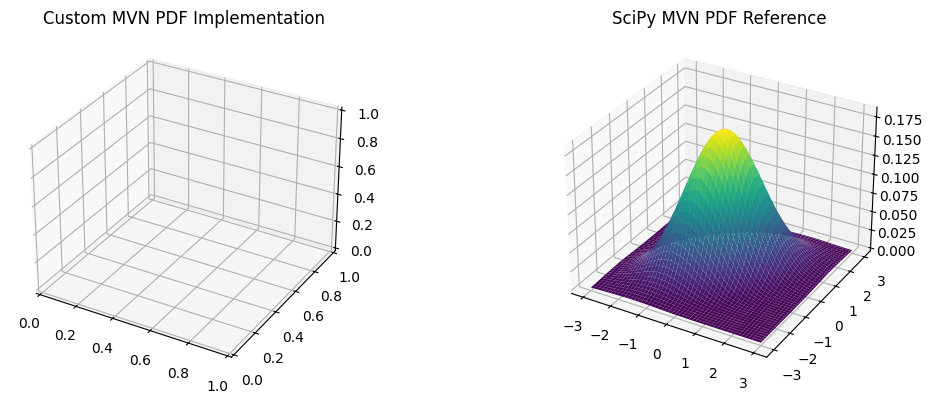

In [46]:
# Generate grid points for visualization
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
grid = np.column_stack([X.ravel(), Y.ravel()])  # Shape (10000, 2)

# Define parameters
mean = np.array([0, 0])
cov = np.array([[1, 0.5],
               [0.5, 1]])

# Compute PDF values
# pdf_values = mvn_pdf(grid, mean, cov)
# pdf_matrix = pdf_values.reshape(X.shape)  # Reshape to (100, 100)

# Plot using SciPy's implementation for validation
mvn = multivariate_normal(mean, cov)
pdf_scipy = mvn.pdf(grid).reshape(X.shape)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'projection': '3d'})

# Custom implementation plot
# axes[0].plot_surface(X, Y, pdf_matrix, cmap='viridis')
axes[0].set_title("Custom MVN PDF Implementation")

# SciPy validation plot
axes[1].plot_surface(X, Y, pdf_scipy, cmap='viridis')
axes[1].set_title("SciPy MVN PDF Reference")

plt.tight_layout()
plt.show()

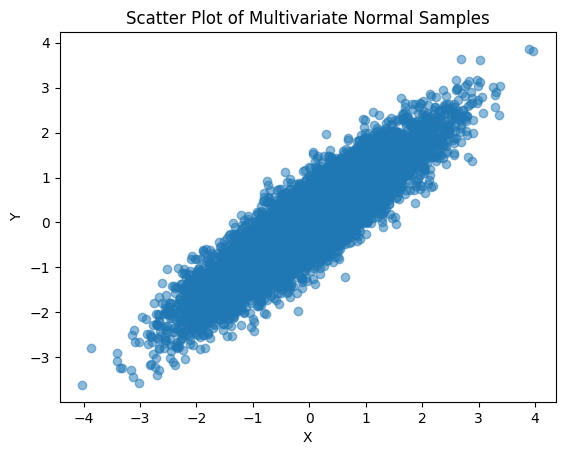

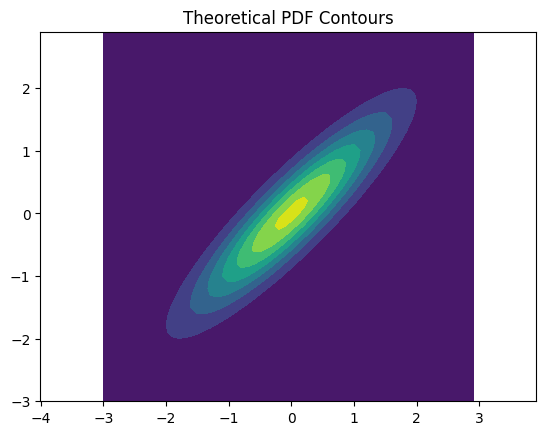

In [55]:
mean = [0, 0]               # Mean of X and Y
cov = [[1, 0.9], [0.9, 1]]  # Covariance matrix (X, Y)
mvn = multivariate_normal(mean, cov)  # Define the distribution


samples = mvn.rvs(10000)  # Generate 10,000 samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)  # Plot samples
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Multivariate Normal Samples')
plt.show()

x, y = np.mgrid[-3:3:0.1, -3:3:0.1]
grid_points = np.dstack((x, y))

# Compute the PDF at each grid point
pdf = mvn.pdf(grid_points)

# Plot the PDF contours
plt.contourf(x, y, pdf, cmap='viridis')
plt.axis("equal")
plt.title("Theoretical PDF Contours")
plt.show()
